In [1]:
import pandas as pd
import urllib.request, json
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
from matplotlib import font_manager, rc
font_fname = 'C:\\Windows\\Fonts\\malgun.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

In [3]:
os.getcwd()

'C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\python_code\\시장현황'

In [4]:
os.chdir('C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\csv파일\\판매량')

In [8]:
os.chdir('C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\csv파일\\판매량')
data = open('final_all_sell(year).json').read()
data = pd.DataFrame(json.loads(data))
data

,Brand,GLOBAL_MODEL,GLOBAL_SEGMENT,Strategic Group,Y2012,Y2013,Y2014,Y2015,Y2016
0,Chevrolet,Spark,A,GM,12385,34130,39159,32853,35511
1,Chevrolet,Aveo,B,GM,81260,85649,93518,64775,55255
10,Chevrolet,Volt,C2,GM,23461,23094,18805,15393,24739
100,Pontiac,G3,B,GM,0,0,0,0,0
101,Pontiac,G5,C1,GM,0,0,0,0,0
102,Pontiac,Vibe,C1,GM,0,0,0,0,0
103,Pontiac,Solstice,C2,GM,0,0,0,0,0
104,Pontiac,Sunfire,C2,GM,0,0,0,0,0
105,Pontiac,Firebird,D2,GM,0,0,0,0,0
106,Pontiac,G6,D2,GM,0,0,0,0,0


In [9]:
total_sum = [ data['Y'+str(year)].sum() for year in range(2012,2017) ]
total_sum = [0,0,0,0] + total_sum
data.loc[('total_sell_year')] = total_sum

In [10]:
year_sell_change = data.loc[('total_sell_year')][4:]
year_sell_change = pd.DataFrame(year_sell_change).reset_index()

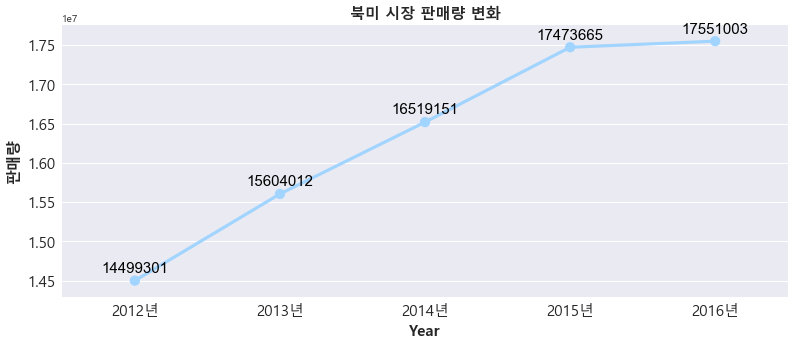

In [11]:
fig, ax = plt.subplots(1,1 , sharex=True)
fig.set_size_inches(13,5)

ax = sns.pointplot(data=year_sell_change, x='index', y='total_sell_year',color='#a1d4ff')
sns.set_style("darkgrid")

plt.xlabel('Year', fontsize=15, weight='bold')
plt.ylabel('판매량', fontsize=15, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=15)

plt.title('북미 시장 판매량 변화', fontsize=15, weight='bold')

[ax.text(p[0], p[1]+100000, p[1], color='black',ha='center', fontsize=15) for p in zip(ax.get_xticks(), year_sell_change['total_sell_year'])]

ax.set_xticklabels(['2012년','2013년','2014년','2015년','2016년'])

plt.savefig('북미 판매량 변화')


## Segment별 판매량 변화 SUV / Sedan / Pick-up

In [12]:
Seg_sum = data.groupby(data['GLOBAL_SEGMENT']).sum().reset_index()

In [13]:
for x in ['SUV-B','SUV-C','SUV-D','SUV-E']:
    Seg_sum.loc[Seg_sum['GLOBAL_SEGMENT'] == x, 'GLOBAL_SEGMENT'] = 'SUV'
for x in ['PUP-C','PUP-D']:
    Seg_sum.loc[Seg_sum['GLOBAL_SEGMENT'] == x, 'GLOBAL_SEGMENT'] = 'PICK-UP'
for x in ['B','C1','C2','D1','D2','E1','E2']:
    Seg_sum.loc[Seg_sum['GLOBAL_SEGMENT'] == x, 'GLOBAL_SEGMENT'] = 'SEDAN'

In [14]:
Seg_3_sell = Seg_sum.groupby(Seg_sum['GLOBAL_SEGMENT']).sum().reset_index().drop([0,1,2,3,4,5,6,7,8,9,10])
Seg_3_sell

,GLOBAL_SEGMENT,Y2012,Y2013,Y2014,Y2015,Y2016
11,PICK-UP,1941535,2175648,2320229,2544597,2692555
12,SEDAN,7232564,7537182,7622925,7500153,6921697
13,SUV,4248218,4765301,5329153,6176680,6649901


In [15]:
pivot_table_seg = pd.DataFrame(Seg_3_sell.stack()).reset_index()
pivot_table_seg.columns = ['Segment','Year','Amount']

In [16]:
pivot_table_seg

,Segment,Year,Amount
0,11,GLOBAL_SEGMENT,PICK-UP
1,11,Y2012,1941535
2,11,Y2013,2175648
3,11,Y2014,2320229
4,11,Y2015,2544597
5,11,Y2016,2692555
6,12,GLOBAL_SEGMENT,SEDAN
7,12,Y2012,7232564
8,12,Y2013,7537182
9,12,Y2014,7622925


In [17]:
pivot_table_seg.loc[pivot_table_seg['Segment'] == 11, 'Segment'] = 'PICK-UP'


In [18]:
pivot_table_seg = pivot_table_seg.drop([0,6,12])
pivot_table_seg

,Segment,Year,Amount
1,PICK-UP,Y2012,1941535
2,PICK-UP,Y2013,2175648
3,PICK-UP,Y2014,2320229
4,PICK-UP,Y2015,2544597
5,PICK-UP,Y2016,2692555
7,12,Y2012,7232564
8,12,Y2013,7537182
9,12,Y2014,7622925
10,12,Y2015,7500153
11,12,Y2016,6921697


In [19]:
zip_test=[0,1,2,3,4,0,1,2,3,4,0,1,2,3,4]

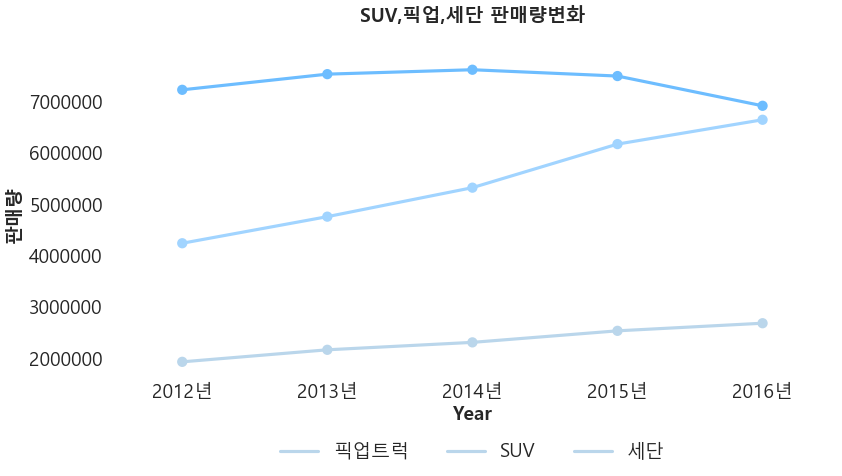

In [71]:
font_fname = 'C:\\Windows\\Fonts\\malgun.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

fig, ax = plt.subplots(1,1 , sharex=True)
fig.set_size_inches(13,6)

label_list =['픽업트럭','SUV','세단']
labels = label_list

current_palette = sns.color_palette("Blues")
test = [current_palette[1], '#6dbdff', '#a1d4ff']
colors= ['#a8c2fb','#6893ee','#86abf9']

ax = sns.pointplot(data=pivot_table_seg, x='Year', y='Amount',hue='Segment', palette=test)

plt.xlabel('Year', fontsize=19, weight='bold')
plt.ylabel('판매량', fontsize=19, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=19)

ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=6, prop={'size':19})

plt.title('SUV,픽업,세단 판매량변화', fontsize=19, weight='bold', y=1.07)


ax.set_xticklabels(['2012년','2013년','2014년','2015년','2016년'])
ax.set_facecolor('white')
plt.savefig('SUV,픽업,세단 판매량변화.png', transparent=True)




In [72]:
current_palette

[(0.8584083044982699, 0.9134486735870818, 0.9645674740484429),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.32628988850442137, 0.6186236063052672, 0.802798923490965),
 (0.16696655132641292, 0.48069204152249134, 0.7291503267973857),
 (0.044059976931949255, 0.3338869665513264, 0.6244521337946944)]

## Segment점유율 변화
* 전체 판매량 에서 SUV/ Sedan / Pick-up 의 판매량을 나눠서 연도별 변화를 살피자

In [73]:
Seg_3_sell2 = Seg_sum.groupby(Seg_sum['GLOBAL_SEGMENT']).sum().reset_index().drop([1,2,3,4,5,6,7,8,9,10])
Seg_3_sell2

,GLOBAL_SEGMENT,Y2012,Y2013,Y2014,Y2015,Y2016
0,0,14499301,15604012,16519151,17473665,17551003
11,PICK-UP,1941535,2175648,2320229,2544597,2692555
12,SEDAN,7232564,7537182,7622925,7500153,6921697
13,SUV,4248218,4765301,5329153,6176680,6649901


In [47]:
merge_table = Seg_3_sell2
merge_table.index = [x for x in range(len(merge_table))]

In [48]:
merge_table

,GLOBAL_SEGMENT,Y2012,Y2013,Y2014,Y2015,Y2016
0,0,14499301,15604012,16519151,17473665,17551003
1,PICK-UP,1941535,2175648,2320229,2544597,2692555
2,SEDAN,7232564,7537182,7622925,7500153,6921697
3,SUV,4248218,4765301,5329153,6176680,6649901


In [49]:
for x in range(2,7):
    merge_table['Y201'+str(x)] = (merge_table['Y201'+str(x)]/merge_table.loc[(0)].values[x-1])*100

In [50]:
merge_table

,GLOBAL_SEGMENT,Y2012,Y2013,Y2014,Y2015,Y2016
0,0,100.000000,100.000000,100.000000,100.000000,100.000000
1,PICK-UP,13.390542,13.942876,14.045692,14.562469,15.341317
2,SEDAN,49.882156,48.302847,46.145985,42.922610,39.437615
3,SUV,29.299468,30.538947,32.260453,35.348509,37.889008


In [51]:
merge_table = merge_table.drop([0])

In [52]:
merge_table

,GLOBAL_SEGMENT,Y2012,Y2013,Y2014,Y2015,Y2016
1,PICK-UP,13.390542,13.942876,14.045692,14.562469,15.341317
2,SEDAN,49.882156,48.302847,46.145985,42.922610,39.437615
3,SUV,29.299468,30.538947,32.260453,35.348509,37.889008


## 전처리

In [53]:
merge_table = pd.DataFrame(merge_table.stack()).reset_index()
merge_table.columns = ['Index','Year','Amount']

In [54]:
for x in set(merge_table['Index']):
    merge_table.loc[merge_table['Index'] == x, 'Index'] = merge_table['Amount'][6*(x-1)]
    merge_table = merge_table.drop([6*(x-1)])

In [55]:
merge_table

,Index,Year,Amount
1,PICK-UP,Y2012,13.3905
2,PICK-UP,Y2013,13.9429
3,PICK-UP,Y2014,14.0457
4,PICK-UP,Y2015,14.5625
5,PICK-UP,Y2016,15.3413
7,SEDAN,Y2012,49.8822
8,SEDAN,Y2013,48.3028
9,SEDAN,Y2014,46.146
10,SEDAN,Y2015,42.9226
11,SEDAN,Y2016,39.4376


In [56]:
hap_table

NameError: name 'hap_table' is not defined

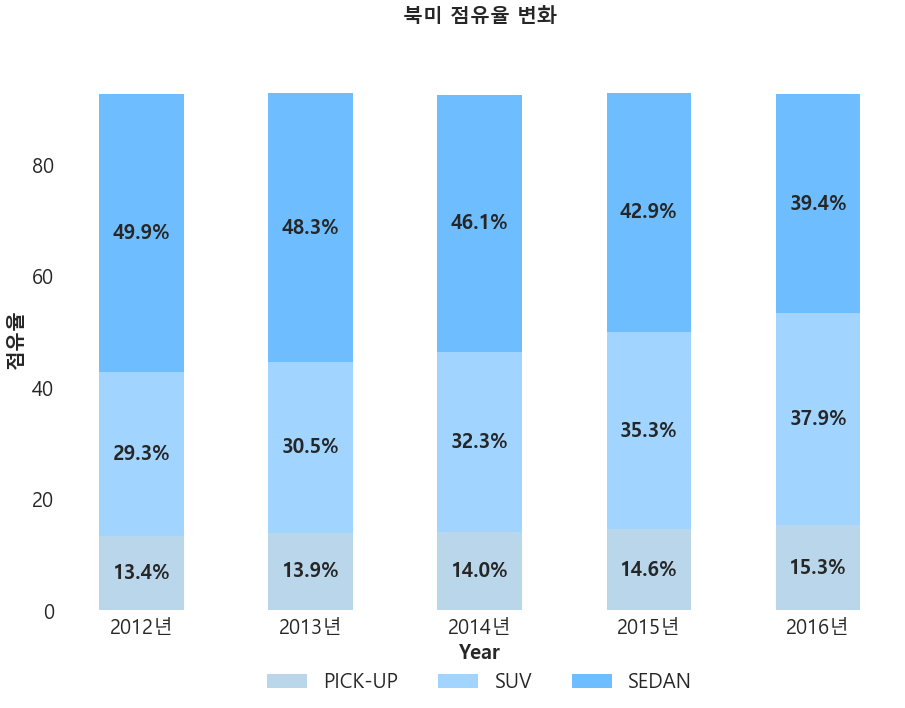

In [69]:

font_fname = 'C:\\Windows\\Fonts\\malgun.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

dummy_table = pd.DataFrame(np.arange(1).reshape(1,1))

## change

label_list = ['PICK-UP','SUV','SEDAN']

for label in label_list:
    new_table = pd.DataFrame(merge_table[merge_table['Index']==label].sort_values('Year')['Amount'])
    new_table.index = [ x for x in range(len(new_table))]
    new_table.columns = [label]
    hap_table = pd.concat([dummy_table, new_table], axis=1)
    dummy_table = hap_table
    
hap_table = hap_table.drop([0],axis=1)

val_index = []
for j in hap_table.columns:
    for i in hap_table.index:
        label = str(round(hap_table.loc[i][j],1)) + "%"
        val_index.append(label)

fig, ax = plt.subplots(1,1)

fig.set_size_inches(15,10)

dates = np.arange(5)
labels = label_list

## change
current_palette = sns.color_palette("Blues")
test = [current_palette[1], '#a1d4ff', '#6dbdff']
colors= ['#a1d4ff','#84c7ff','#77c1ff']
margin_bottom = np.zeros(5)

for index, label in enumerate(labels):
    ## change
    values = merge_table[merge_table['Index']==label].sort_values('Year')['Amount'].apply(float)
    
    ax.bar(dates, values,
          align='center', width=0.5, label=label, color=test[index], bottom=margin_bottom)
    margin_bottom += values
    
patches = ax.patches
for label, rect in zip(val_index, patches):
    width = rect.get_width()
    if width >0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x+width/2., y+height/2., label, ha='center', va='center', fontsize=20, weight='bold')
        
ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, -0.08),
          fancybox=True, shadow=True, ncol=6, prop={'size':20})


ax.set_xticklabels(['0','2012년','2013년','2014년','2015년','2016년'])

plt.xlabel('Year', fontsize=20, weight='bold')
plt.ylabel('점유율', fontsize=20, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)

plt.title('북미 점유율 변화', fontsize=20, weight='bold',y=1.07)
ax.set_facecolor('white')
plt.savefig('북미 점유율 변화.png', transparent=True)

## PICK-UP 점유율 변화

In [74]:
Seg_sum2 = data.groupby(data['GLOBAL_SEGMENT']).sum().reset_index()
Seg_sum2

,GLOBAL_SEGMENT,Y2012,Y2013,Y2014,Y2015,Y2016
0,0,14499301,15604012,16519151,17473665,17551003
1,A,75636,84303,85556,66021,57259
2,B,438821,445764,448098,404731,398157
3,C1,2208151,2320484,2376913,2376048,2254964
4,C2,395363,407815,408263,418163,381552
5,CDV,35216,44387,57125,90945,84746
6,D1,2240452,2300143,2310849,2191816,2042096
7,D2,1345826,1423296,1443731,1528876,1290263
8,E1,500671,508461,490993,438527,423819
9,E2,103280,131219,144078,141992,130846


In [75]:
Pick_c = Seg_sum2[Seg_sum2['GLOBAL_SEGMENT'] =='PUP-C']
Pick_d = Seg_sum2[Seg_sum2['GLOBAL_SEGMENT'] =='PUP-D']
Pick_table = pd.concat([Pick_c,Pick_d])
Pick_table.index = [x for x in range(len(Pick_table))]
total_sum = [ Pick_table['Y'+str(year)].sum() for year in range(2012,2017) ]
total_sum = [0] + total_sum
Pick_table.loc[('total_sell')] = total_sum

In [76]:
Pick_table

,GLOBAL_SEGMENT,Y2012,Y2013,Y2014,Y2015,Y2016
0,PUP-C,277738,244845,253827,357408,448400
1,PUP-D,1663797,1930803,2066402,2187189,2244155
total_sell,0,1941535,2175648,2320229,2544597,2692555


In [77]:
for x in range(2,7):
    Pick_table['Y201'+str(x)] = (Pick_table['Y201'+str(x)]/Pick_table.loc[('total_sell')].values[x-1])*100

In [78]:
Pick_table = Pick_table.drop(['total_sell'])

### Table 전처리

In [79]:
Pick_pivot = pd.DataFrame(Pick_table.stack()).reset_index()
Pick_pivot.columns = ['Index','Year','Amount']
Pick_pivot

,Index,Year,Amount
0,0,GLOBAL_SEGMENT,PUP-C
1,0,Y2012,14.3051
2,0,Y2013,11.2539
3,0,Y2014,10.9397
4,0,Y2015,14.0458
5,0,Y2016,16.6533
6,1,GLOBAL_SEGMENT,PUP-D
7,1,Y2012,85.6949
8,1,Y2013,88.7461
9,1,Y2014,89.0603


In [80]:
for x in set(Pick_pivot['Index']):
    Pick_pivot.loc[Pick_pivot['Index'] == x, 'Index'] = Pick_pivot['Amount'][6*x]
    Pick_pivot = Pick_pivot.drop([6*x])

In [81]:
from matplotlib import font_manager, rc
font_fname = 'C:\\Windows\\Fonts\\malgun.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

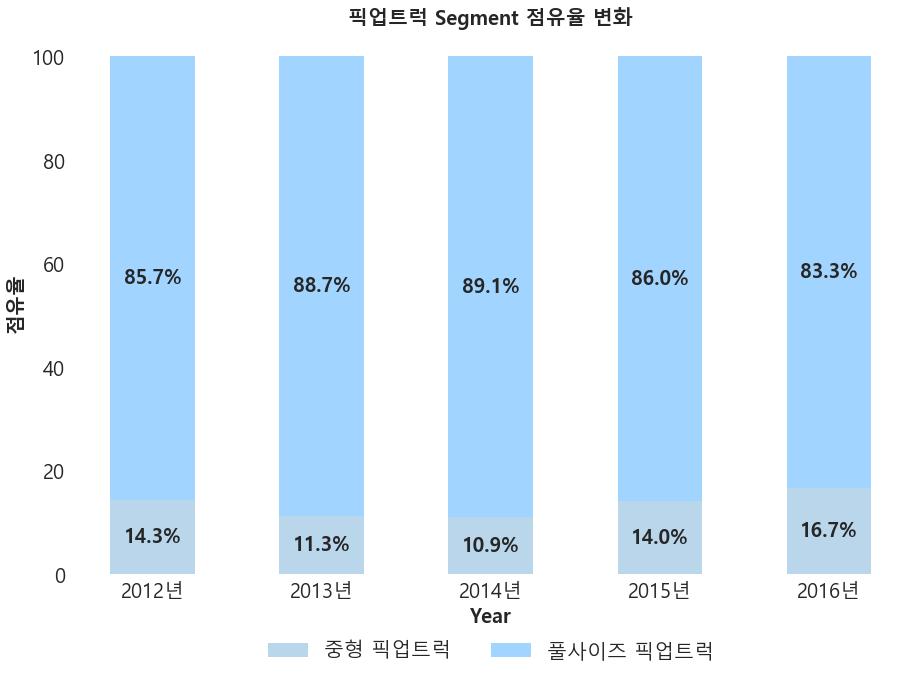

In [99]:
dummy_table = pd.DataFrame(np.arange(1).reshape(1,1))

## change
label_list = ['PUP-C','PUP-D']

for label in label_list:
    new_table = pd.DataFrame(Pick_pivot[Pick_pivot['Index']==label].sort_values('Year')['Amount'])
    new_table.index = [ x for x in range(len(new_table))]
    new_table.columns = [label]
    hap_table = pd.concat([dummy_table, new_table], axis=1)
    dummy_table = hap_table
    
hap_table = hap_table.drop([0],axis=1)

val_index = []
for j in hap_table.columns:
    for i in hap_table.index:
        label = str(round(hap_table.loc[i][j],1)) + "%"
        val_index.append(label)

fig, ax = plt.subplots(1,1)

fig.set_size_inches(15,10)

dates = np.arange(5)
labels = label_list

## change
current_palette = sns.color_palette("Blues")
test = [current_palette[1], '#a1d4ff', '#6dbdff']
colors= ['#a1d4ff','#84c7ff','#77c1ff']
margin_bottom = np.zeros(5)

for index, label in enumerate(labels):
    values = Pick_pivot[Pick_pivot['Index']==label].sort_values('Year')['Amount'].apply(float)
    ax.bar(dates, values,
          align='center', width=0.5, label=label, color=test[index], bottom=margin_bottom)
    margin_bottom += values
    
patches = ax.patches
for label, rect in zip(val_index, patches):
    width = rect.get_width()
    if width >0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x+width/2., y+height/2., label, ha='center', va='center', fontsize=20, weight='bold')
        
l = ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, -0.09),
          fancybox=True, shadow=True, ncol=6, prop={'size':20})

l.get_texts()[0].set_text('중형 픽업트럭')
l.get_texts()[1].set_text('풀사이즈 픽업트럭')

plt.xlabel('Year', fontsize=20, weight='bold')
plt.ylabel('점유율', fontsize=20, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)

ax.set_xticklabels(['0','2012년','2013년','2014년','2015년','2016년'])

ax.set_facecolor('white')
plt.title('픽업트럭 Segment 점유율 변화', fontsize=20, weight='bold')
plt.savefig('Pick-up 점유율 변화.png', transparent=True)

## SUV점유율 변화

In [88]:
suv_b = Seg_sum2[Seg_sum2['GLOBAL_SEGMENT'] =='SUV-B']
suv_c = Seg_sum2[Seg_sum2['GLOBAL_SEGMENT'] =='SUV-C']
suv_d = Seg_sum2[Seg_sum2['GLOBAL_SEGMENT'] =='SUV-D']
suv_e = Seg_sum2[Seg_sum2['GLOBAL_SEGMENT'] =='SUV-E']
merge_table = pd.concat([suv_b,suv_c,suv_d,suv_e])
merge_table.index = [x for x in range(len(merge_table))]
total_sum = [ merge_table['Y'+str(year)].sum() for year in range(2012,2017) ]
total_sum = [0] + total_sum
merge_table.loc[('total_sell')] = total_sum

In [89]:
for x in range(2,7):
    merge_table['Y201'+str(x)] = (merge_table['Y201'+str(x)]/merge_table.loc[('total_sell')].values[x-1])*100

In [90]:
merge_table

,GLOBAL_SEGMENT,Y2012,Y2013,Y2014,Y2015,Y2016
0,SUV-B,1.076710,1.492728,1.647823,4.476272,5.956089
1,SUV-C,43.616571,45.094528,48.377932,47.426271,45.962639
2,SUV-D,35.188496,33.625746,30.646859,30.609713,29.877648
3,SUV-E,20.118224,19.786998,19.327387,17.487744,18.203624
total_sell,0,100.000000,100.000000,100.000000,100.000000,100.000000


In [91]:
merge_table = merge_table.drop(['total_sell'])

## 전처리

In [92]:
merge_table = pd.DataFrame(merge_table.stack()).reset_index()
merge_table.columns = ['Index','Year','Amount']

In [93]:
for x in set(merge_table['Index']):
    merge_table.loc[merge_table['Index'] == x, 'Index'] = merge_table['Amount'][6*x]
    merge_table = merge_table.drop([6*x])

In [94]:
from matplotlib import font_manager, rc
font_fname = 'C:\\Windows\\Fonts\\malgun.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

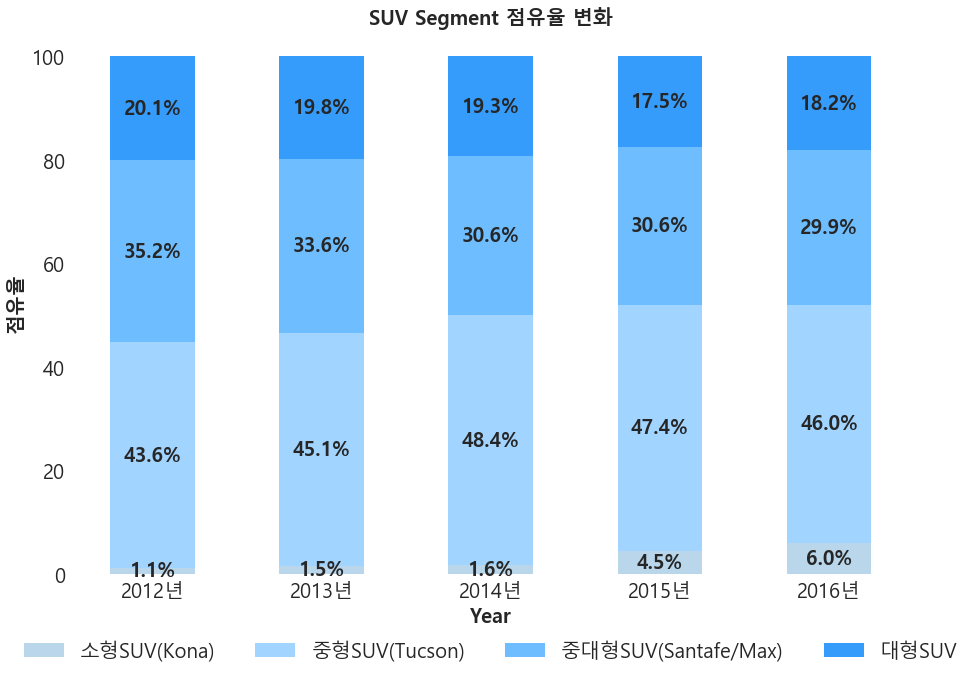

In [98]:
dummy_table = pd.DataFrame(np.arange(1).reshape(1,1))

## change
label_list = ['SUV-B','SUV-C','SUV-D','SUV-E']

for label in label_list:
    new_table = pd.DataFrame(merge_table[merge_table['Index']==label].sort_values('Year')['Amount'])
    new_table.index = [ x for x in range(len(new_table))]
    new_table.columns = [label]
    hap_table = pd.concat([dummy_table, new_table], axis=1)
    dummy_table = hap_table
    
hap_table = hap_table.drop([0],axis=1)

val_index = []
for j in hap_table.columns:
    for i in hap_table.index:
        label = str(round(hap_table.loc[i][j],1)) + "%"
        val_index.append(label)

fig, ax = plt.subplots(1,1)

fig.set_size_inches(15,10)

dates = np.arange(5)
labels = label_list

## change
current_palette = sns.color_palette("Blues")
test = [current_palette[1], '#a1d4ff', '#6dbdff','#359cfb']
colors= ['#a1d4ff','#84c7ff','#77c1ff','#6dbdff']
margin_bottom = np.zeros(5)


for index, label in enumerate(labels):
    ## change
    values = merge_table[merge_table['Index']==label].sort_values('Year')['Amount'].apply(float)
    
    ax.bar(dates, values,
          align='center', width=0.5, label=label, color=test[index], bottom=margin_bottom)
    margin_bottom += values
    
patches = ax.patches
for label, rect in zip(val_index, patches):
    width = rect.get_width()
    if width >0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x+width/2., y+height/2., label, ha='center', va='center', fontsize=20, weight='bold')
        
l = ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, -0.09),
          fancybox=True, shadow=True, ncol=6, prop={'size':20})


l.get_texts()[0].set_text('소형SUV(Kona)')
l.get_texts()[1].set_text('중형SUV(Tucson)')
l.get_texts()[2].set_text('중대형SUV(Santafe/Max)')
l.get_texts()[3].set_text('대형SUV')

plt.xlabel('Year', fontsize=20, weight='bold')
plt.ylabel('점유율', fontsize=20, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)

ax.set_xticklabels(['0','2012년','2013년','2014년','2015년','2016년'])

plt.title('SUV Segment 점유율 변화', fontsize=20, weight='bold')
ax.set_facecolor('white')

plt.savefig('SUV 점유율 변화.png',transparent=True)

## Tucson 점유율 변화

In [100]:
data2 = data[data['GLOBAL_SEGMENT'] == 'SUV-C']
data2 = data2[data2['Y2016'] != 0]
data2

,Brand,GLOBAL_MODEL,GLOBAL_SEGMENT,Strategic Group,Y2012,Y2013,Y2014,Y2015,Y2016
155,Ford,Escape,SUV-C,Ford,261008,295993,306212,306492,307069
185,Lincoln,MKC,SUV-C,Ford,0,0,13077,24590,25562
22,Chevrolet,Equinox,SUV-C,GM,218621,238194,242244,277590,242195
224,Toyota,FJ Cruiser,SUV-C,Toyota,13655,13131,14718,229,6
225,Toyota,RAV4,SUV-C,Toyota,171877,218201,267690,315414,352138
265,Jeep,Cherokee,SUV-C,FCA,0,25786,178947,220260,199736
266,Jeep,Compass,SUV-C,FCA,40235,52993,61264,66698,94061
268,Jeep,Patriot,SUV-C,FCA,62010,75797,93462,118464,121926
269,Jeep,Wrangler,SUV-C,FCA,52983,50682,60628,63926,58499
270,Jeep,Wrangler Unlimited,SUV-C,FCA,88686,104820,114700,138776,133275


In [101]:
data2 = data2[['GLOBAL_MODEL','Y2012','Y2013','Y2014','Y2015','Y2016']]

In [102]:
merge_table = data2
merge_table.index = [x for x in range(len(merge_table))]
total_sum = [ merge_table['Y'+str(year)].sum() for year in range(2012,2017) ]
total_sum = [0] + total_sum
merge_table.loc[('total_sell')] = total_sum

C:\Users\kb910\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [103]:
merge_table

,GLOBAL_MODEL,Y2012,Y2013,Y2014,Y2015,Y2016
0,Escape,261008,295993,306212,306492,307069
1,MKC,0,0,13077,24590,25562
2,Equinox,218621,238194,242244,277590,242195
3,FJ Cruiser,13655,13131,14718,229,6
4,RAV4,171877,218201,267690,315414,352138
5,Cherokee,0,25786,178947,220260,199736
6,Compass,40235,52993,61264,66698,94061
7,Patriot,62010,75797,93462,118464,121926
8,Wrangler,52983,50682,60628,63926,58499
9,Wrangler Unlimited,88686,104820,114700,138776,133275


In [104]:
sell_list = merge_table[merge_table['GLOBAL_MODEL']=='Tucson'][['Y2012','Y2013','Y2014','Y2015','Y2016']].unstack().reset_index()[0]
sell_list = [ str(x)[:2]+","+str(x)[:-2]+"대" for x in sell_list ]

In [105]:
for x in range(2,7):
    merge_table['Y201'+str(x)] = (merge_table['Y201'+str(x)]/merge_table.loc[('total_sell')].values[x-1])*100

C:\Users\kb910\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [106]:
merge_table = merge_table.drop(['total_sell'])

## 전처리

In [107]:
merge_table = pd.DataFrame(merge_table.stack()).reset_index()
merge_table.columns = ['Index','Year','Amount']

In [108]:
for x in set(merge_table['Index']):
    merge_table.loc[merge_table['Index'] == x, 'Index'] = merge_table['Amount'][6*x]
    merge_table = merge_table.drop([6*x])

In [109]:
rank_list = []

for year in ['Y2012','Y2013','Y2014','Y2015','Y2016']:

    test = merge_table[merge_table['Year']==year].sort_values('Amount', ascending=False)
    test.index = test['Index']
    test = test.rank(ascending=False)
    rank_list.append(str(test.loc['Tucson']['Amount']).split('.')[0] + "위")
    
sr_list = [ sell_list[x] +" ("+rank_list[x]+")" for x in range(5) ]

In [110]:
merge_table.groupby(merge_table['Index']).sum().sort_values('Amount',ascending=False)[:20]

,Year,Amount
Index,,
CR-V,Y2012Y2013Y2014Y2015Y2016,67.411113
Escape,Y2012Y2013Y2014Y2015Y2016,61.729309
RAV4,Y2012Y2013Y2014Y2015Y2016,53.141626
Equinox,Y2012Y2013Y2014Y2015Y2016,50.901513
Forester,Y2012Y2013Y2014Y2015Y2016,28.416157
X-Trail,Y2012Y2013Y2014Y2015Y2016,24.122633
Wrangler Unlimited,Y2012Y2013Y2014Y2015Y2016,23.725493
Cherokee,Y2012Y2013Y2014Y2015Y2016,22.322768
Terrain,Y2012Y2013Y2014Y2015Y2016,21.219544


In [111]:
from matplotlib import font_manager, rc
font_fname = 'C:\\Windows\\Fonts\\malgun.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

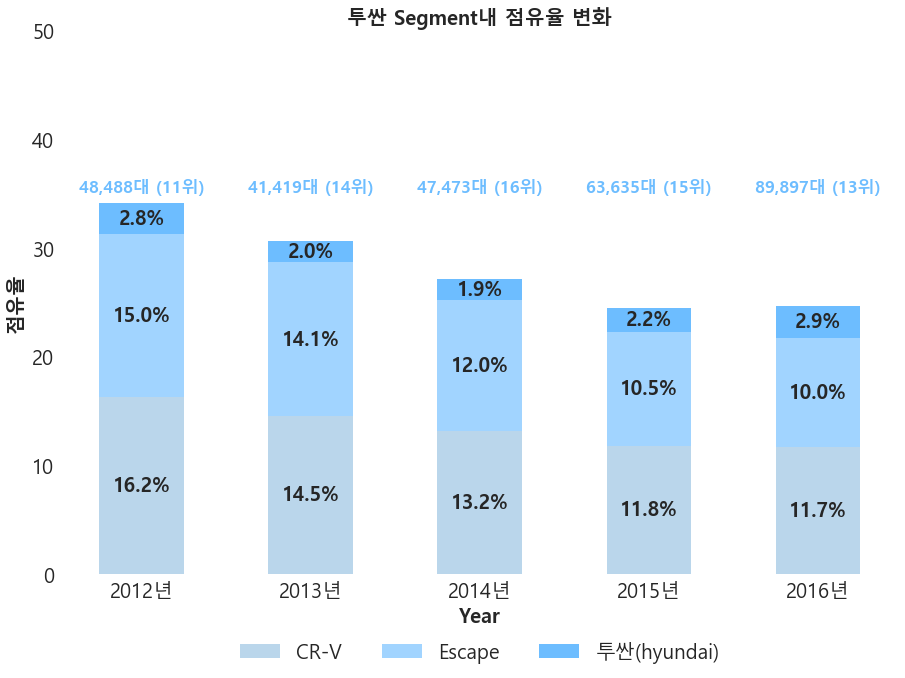

In [119]:
dummy_table = pd.DataFrame(np.arange(1).reshape(1,1))

## change
label_list = ['CR-V','Escape','Tucson']

for label in label_list:
    new_table = pd.DataFrame(merge_table[merge_table['Index']==label].sort_values('Year')['Amount'])
    new_table.index = [ x for x in range(len(new_table))]
    new_table.columns = [label]
    hap_table = pd.concat([dummy_table, new_table], axis=1)
    dummy_table = hap_table
    
hap_table = hap_table.drop([0],axis=1)

val_index = []
for j in hap_table.columns:
    for i in hap_table.index:
        label = str(round(hap_table.loc[i][j],1)) + "%"
        val_index.append(label)

fig, ax = plt.subplots(1,1)

fig.set_size_inches(15,10)

dates = np.arange(5)
labels = label_list

## change
current_palette = sns.color_palette("Blues")
test = [current_palette[1], '#a1d4ff', '#6dbdff']
colors= ['#afdaff','#a1d4ff','#84c7ff','#77c1ff','#6dbdff']
margin_bottom = np.zeros(5)

for index, label in enumerate(labels):
    ## change
    values = merge_table[merge_table['Index']==label].sort_values('Year')['Amount'].apply(float)
    
    ax.bar(dates, values,
          align='center', width=0.5, label=label, color=test[index], bottom=margin_bottom)
    margin_bottom += values
    
patches = ax.patches
for label, rect in zip(val_index, patches):
    width = rect.get_width()
    if width >0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x+width/2., y+height/2., label, ha='center', va='center', fontsize=20, weight='bold')

for label, rect in zip(sr_list, patches):
    width = rect.get_width()
    if width >0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x+width/2., 35.5, label, ha='center', va='center', fontsize=17, weight='bold', color='#6dbdff')        
        
        
l = ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, -0.09),
          fancybox=True, shadow=True, ncol=6, prop={'size':20})

l.get_texts()[2].set_text('투싼(hyundai)')
plt.ylim([0,50])
plt.xlabel('Year', fontsize=20, weight='bold')
plt.ylabel('점유율', fontsize=20, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)

ax.set_xticklabels(['0','2012년','2013년','2014년','2015년','2016년'])

plt.title('투싼 Segment내 점유율 변화', fontsize=20, weight='bold')

ax.set_facecolor('white')
plt.savefig('Tucson 점유율 변화.png', transparent=True)

## Santa-fe 점유율 변화

In [120]:
data2 = data[data['GLOBAL_SEGMENT'] == 'SUV-D']
data2 = data2[data2['Y2016'] != 0]
data2 = data2[['GLOBAL_MODEL','Y2012','Y2013','Y2014','Y2015','Y2016']]

In [121]:
merge_table = data2
merge_table.index = [x for x in range(len(merge_table))]
total_sum = [ merge_table['Y'+str(year)].sum() for year in range(2012,2017) ]
total_sum = [0] + total_sum
merge_table.loc[('total_sell')] = total_sum

In [122]:
sell_list = merge_table[merge_table['GLOBAL_MODEL']=='Santa Fe'][['Y2012','Y2013','Y2014','Y2015','Y2016']].unstack().reset_index()[0]
sell_list1 = [ str(x)[:2]+","+str(x)[:-2]+"대" for x in sell_list ]
sell_list = merge_table[merge_table['GLOBAL_MODEL']=='Maxcruz'][['Y2012','Y2013','Y2014','Y2015','Y2016']].unstack().reset_index()[0]
sell_list2 = [ str(x)[:2]+","+str(x)[:-2]+"대" for x in sell_list ]

In [123]:
sell_list1

['71,710대', '71,710대', '75,754대', '86,864대', '91,918대']

In [124]:
for x in range(2,7):
    merge_table['Y201'+str(x)] = (merge_table['Y201'+str(x)]/merge_table.loc[('total_sell')].values[x-1])*100

In [125]:
merge_table = merge_table.drop(['total_sell'])

## 전처리

In [126]:
merge_table = pd.DataFrame(merge_table.stack()).reset_index()
merge_table.columns = ['Index','Year','Amount']

In [127]:
for x in set(merge_table['Index']):
    merge_table.loc[merge_table['Index'] == x, 'Index'] = merge_table['Amount'][6*x]
    merge_table = merge_table.drop([6*x])

In [139]:
rank_list = []

for year in ['Y2012','Y2013','Y2014','Y2015','Y2016']:

    test = merge_table[merge_table['Year']==year].sort_values('Amount', ascending=False)
    test.index = test['Index']
    test = test.rank(ascending=False)
    rank_list.append(str(test.loc['Santa Fe']['Amount']).split('.')[0] + "위")
    
sr_list1 = [ sell_list1[x] +" ("+rank_list[x]+")" for x in range(5) ]

In [137]:
rank_list = []

for year in ['Y2012','Y2013','Y2014','Y2015','Y2016']:

    test = merge_table[merge_table['Year']==year].sort_values('Amount', ascending=False)
    test.index = test['Index']
    test = test.rank(ascending=False)
    rank_list.append(str(test.loc['Maxcruz']['Amount']).split('.')[0] + "위")
    
sr_list2 = [ sell_list2[x] +" ("+rank_list[x]+")" for x in range(5) ]

In [138]:
sr_list2[0] = '출시전'

In [140]:
sr_list2

['출시전', '17,178대 (23위)', '32,324대 (18위)', '31,317대 (18위)', '39,393대 (19위)']

In [141]:
merge_table

,Index,Year,Amount
1,Edge,Y2012,8.70574
2,Edge,Y2013,8.06631
3,Edge,Y2014,6.6682
4,Edge,Y2015,6.56489
5,Edge,Y2016,6.77399
7,Explorer,Y2012,11.171
8,Explorer,Y2013,12.0203
9,Explorer,Y2014,12.8627
10,Explorer,Y2015,13.1833
11,Explorer,Y2016,12.5077


In [142]:
merge_table.groupby(merge_table['Index']).sum().sort_values('Amount',ascending=False)[:30]

,Year,Amount
Index,,
Explorer,Y2012Y2013Y2014Y2015Y2016,61.744967
Highlander,Y2012Y2013Y2014Y2015Y2016,43.193922
Edge,Y2012Y2013Y2014Y2015Y2016,36.779133
Pilot,Y2012Y2013Y2014Y2015Y2016,35.678387
Sorento,Y2012Y2013Y2014Y2015Y2016,32.939657
Traverse,Y2012Y2013Y2014Y2015Y2016,30.435288
Acadia,Y2012Y2013Y2014Y2015Y2016,25.629849
Santa Fe,Y2012Y2013Y2014Y2015Y2016,23.086798
Hilux Surf,Y2012Y2013Y2014Y2015Y2016,22.019687


In [143]:
from matplotlib import font_manager, rc
font_fname = 'C:\\Windows\\Fonts\\malgun.ttf'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family=font_name)

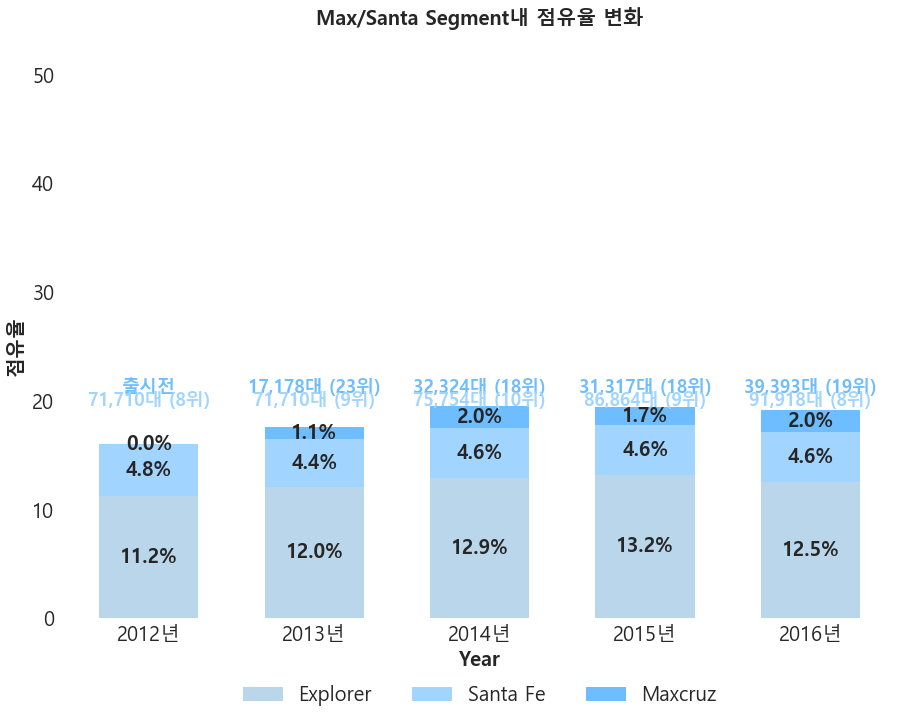

In [156]:
dummy_table = pd.DataFrame(np.arange(1).reshape(1,1))

## change
label_list = ['Explorer','Santa Fe','Maxcruz']

for label in label_list:
    new_table = pd.DataFrame(merge_table[merge_table['Index']==label].sort_values('Year')['Amount'])
    new_table.index = [ x for x in range(len(new_table))]
    new_table.columns = [label]
    hap_table = pd.concat([dummy_table, new_table], axis=1)
    dummy_table = hap_table
    
hap_table = hap_table.drop([0],axis=1)

val_index = []
for j in hap_table.columns:
    for i in hap_table.index:
        label = str(round(hap_table.loc[i][j],1)) + "%"
        val_index.append(label)

fig, ax = plt.subplots(1,1)

fig.set_size_inches(15,10)

dates = np.arange(5)
labels = label_list

## change
colors= ['#afdaff','#a1d4ff','#84c7ff','#77c1ff','#6dbdff']
margin_bottom = np.zeros(5)
current_palette = sns.color_palette("Blues")
test = [current_palette[1], '#a1d4ff', '#6dbdff']

for index, label in enumerate(labels):
    ## change
    values = merge_table[merge_table['Index']==label].sort_values('Year')['Amount'].apply(float)
    
    ax.bar(dates, values,
          align='center', width=0.6, label=label, color=test[index], bottom=margin_bottom)
    margin_bottom += values
    
patches = ax.patches
for label, rect in zip(val_index, patches):
    width = rect.get_width()
    if width >0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x+width/2., y+height/2., label, ha='center', va='center', fontsize=20, weight='bold')

for label, rect in zip(sr_list2, patches):
    width = rect.get_width()
    if width >0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x+width/2., 21.2, label, ha='center', va='center', fontsize=18, weight='bold', color='#6dbdff')
        
for label, rect in zip(sr_list1, patches):
    width = rect.get_width()
    if width >0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x+width/2., 20, label, ha='center', va='center', fontsize=18, weight='bold', color='#a1d4ff')
        
        
ax.legend(labels,loc='upper center', bbox_to_anchor=(0.5, -0.09),
          fancybox=True, shadow=True, ncol=6, prop={'size':20})

plt.ylim([0,50])

plt.xlabel('Year', fontsize=20, weight='bold')
plt.ylabel('점유율', fontsize=20, weight='bold')
plt.tick_params(axis='both', which='major', labelsize=20)

ax.set_xticklabels(['0','2012년','2013년','2014년','2015년','2016년'])

plt.title('Max/Santa Segment내 점유율 변화', fontsize=20, weight='bold', y=1.08)
ax.set_facecolor('white')

plt.savefig('Max,Santa 점유율 변화.png', transparent=True)

## 라인업 확장 / 변화 파악

In [157]:
os.chdir('C:\\Users\\kb910\\Google 드라이브\\경배끄10\\인턴\\csv파일\\판매량')
data = open('final_all_sell(year).json').read()
data = pd.DataFrame(json.loads(data))
data

,Brand,GLOBAL_MODEL,GLOBAL_SEGMENT,Strategic Group,Y2012,Y2013,Y2014,Y2015,Y2016
0,Chevrolet,Spark,A,GM,12385,34130,39159,32853,35511
1,Chevrolet,Aveo,B,GM,81260,85649,93518,64775,55255
10,Chevrolet,Volt,C2,GM,23461,23094,18805,15393,24739
100,Pontiac,G3,B,GM,0,0,0,0,0
101,Pontiac,G5,C1,GM,0,0,0,0,0
102,Pontiac,Vibe,C1,GM,0,0,0,0,0
103,Pontiac,Solstice,C2,GM,0,0,0,0,0
104,Pontiac,Sunfire,C2,GM,0,0,0,0,0
105,Pontiac,Firebird,D2,GM,0,0,0,0,0
106,Pontiac,G6,D2,GM,0,0,0,0,0


## 현재 SUV시장 '순위'파악

In [158]:
data['Strategic Group'].unique()

array(['GM', 'Ford', 'Toyota', 'FCA', 'Honda', 'Renault-Nissan',
       'Hyundai-Kia', 'Volkswagen', 'Fuji Heavy', 'Daimler', 'BMW',
       'Mazda', 'Tata', 'Geely', 'Tesla Motors', 'Ferrari', 'Mclaren',
       'Aston Martin', 'Fisker Automotive', 'Proton', 'Isuzu', 'Changan',
       'Faraday Future', 'Lucid Motors', 'Saab Spyker Automobiles',
       'Suzuki', 'Vehicle Production Group'], dtype=object)

In [159]:
for x in ['SUV-B','SUV-C','SUV-D','SUV-E']:
    data.loc[data['GLOBAL_SEGMENT'] == x, 'GLOBAL_SEGMENT'] = 'SUV'

In [160]:
test = data[data['GLOBAL_SEGMENT']=='SUV']
test = test[test['Y2016'] != 0]
test2 = test.groupby(test['Brand']).sum().reset_index()

In [161]:
merge_table = test2
merge_table.index = [x for x in range(len(merge_table))]
total_sum = [ merge_table['Y'+str(year)].sum() for year in range(2012,2017) ]
total_sum = [0] + total_sum
merge_table.loc[('total_sell')] = total_sum

In [162]:
merge_table.index = merge_table['Brand']
merge_table.rank(ascending=False)['Y2016']

Brand
Acura            17.0
Audi             19.0
BMW              16.0
Bentley          33.0
Buick            15.0
Cadillac         18.0
Chevrolet         5.0
Dodge            22.0
Fiat             30.0
Ford              3.0
GMC               9.0
Honda             6.0
Hyundai          10.0
Infiniti         20.0
Jaguar           31.0
Jeep              2.0
Kia              11.0
Land Rover       21.0
Lexus            12.0
Lincoln          23.0
Maserati         32.0
Mazda            14.0
Mercedes-Benz    13.0
Mini             29.0
Mitsubishi       24.0
Nissan            7.0
Porsche          27.0
Subaru            8.0
Tesla            28.0
Toyota            4.0
Volkswagen       26.0
Volvo            25.0
0                 1.0
Name: Y2016, dtype: float64

## Jeep과 Toyota 파악

### Jeep

In [163]:
test=data[data['Brand']=='Jeep']
test = test[test['GLOBAL_SEGMENT']=='SUV']
print(test['Y2016'].sum())
Jeep_table = test
Jeep_table = Jeep_table[['GLOBAL_MODEL','Y2012','Y2013','Y2014','Y2015','Y2016']]
merge_table = Jeep_table
merge_table.index = [x for x in range(len(merge_table))]
merge_table

926376


,GLOBAL_MODEL,Y2012,Y2013,Y2014,Y2015,Y2016
0,Renegade,0,0,0,60946,106606
1,Cherokee,0,25786,178947,220260,199736
2,Compass,40235,52993,61264,66698,94061
3,Liberty,75483,6101,0,0,0
4,Patriot,62010,75797,93462,118464,121926
5,Wrangler,52983,50682,60628,63926,58499
6,Wrangler Unlimited,88686,104820,114700,138776,133275
7,Commander,0,0,0,0,0
8,Grand Cherokee,154734,174275,183347,195958,212273
9,Grand Wagoneer,0,0,0,0,0


In [164]:
total_sum = [ merge_table['Y'+str(year)].sum() for year in range(2012,2017) ]
total_sum = [0] + total_sum
merge_table.loc[('total_sell')] = total_sum

C:\Users\kb910\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [165]:
Jeep_data = pd.DataFrame(merge_table.loc['total_sell']).reset_index()
Jeep_data.columns = ['Year','Amount']
Jeep_data = Jeep_data.drop(0)
Jeep_data

,Year,Amount
1,Y2012,474131
2,Y2013,490454
3,Y2014,692348
4,Y2015,865028
5,Y2016,926376


In [166]:
sell_list = [str(x)[:3]+','+str(x)[-3:]+'대' for x in Jeep_data['Amount']]
sell_list

['474,131대', '490,454대', '692,348대', '865,028대', '926,376대']

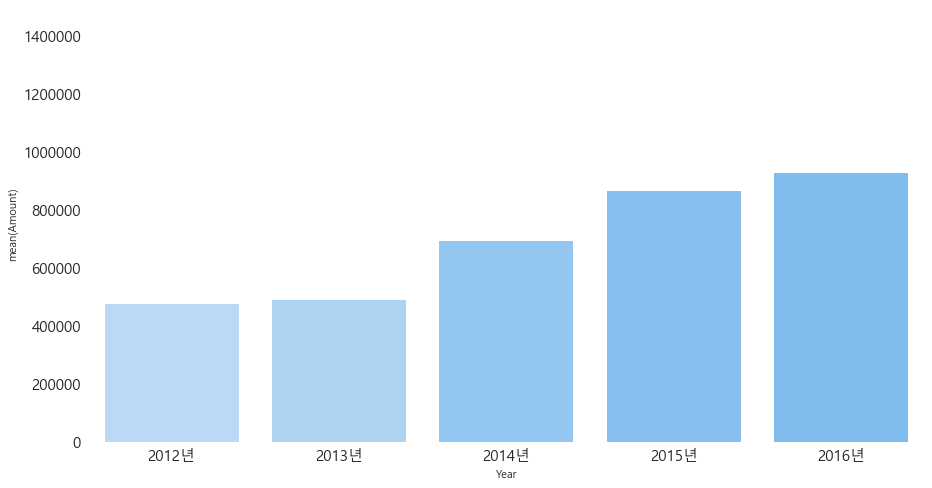

In [167]:
colors= ['#afdaff','#a1d4ff','#84c7ff','#77c1ff','#6dbdff']

fig, ax = plt.subplots(1,1)
fig.set_size_inches(15,8)

ax = sns.barplot(data=Jeep_data, x='Year', y='Amount', palette=colors)


plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylim(0,1500000)

pathces = ax.patches

ax.set_xticklabels(['2012년','2013년','2014년','2015년','2016년'])

ax.set_facecolor('white')
plt.savefig('jeep.png',transparent=True)

### Toyota

In [168]:
test=data[data['Brand']=='Toyota']
test = test[test['GLOBAL_SEGMENT']=='SUV']
print(test['Y2016'].sum())
Jeep_table = test
Jeep_table = Jeep_table[['GLOBAL_MODEL','Y2012','Y2013','Y2014','Y2015','Y2016']]
merge_table = Jeep_table
merge_table.index = [x for x in range(len(merge_table))]
merge_table

672540


,GLOBAL_MODEL,Y2012,Y2013,Y2014,Y2015,Y2016
0,B-CUV,0,0,0,0,0
1,C-HR,0,0,0,0,0
2,FJ Cruiser,13655,13131,14718,229,6
3,RAV4,171877,218201,267690,315414,352138
4,Mirai-HR,0,0,0,0,0
5,Highlander,121054,127573,146127,158915,191379
6,Hilux Surf,48753,51625,76906,97034,111952
7,Kluger V,0,0,0,0,0
8,Venza,43094,35846,29991,21351,589
9,Land Cruiser,2895,3082,3158,2687,3705


In [169]:
total_sum = [ merge_table['Y'+str(year)].sum() for year in range(2012,2017) ]
total_sum = [0] + total_sum
merge_table.loc[('total_sell')] = total_sum

C:\Users\kb910\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [170]:
Jeep_data = pd.DataFrame(merge_table.loc['total_sell']).reset_index()
Jeep_data.columns = ['Year','Amount']
Jeep_data = Jeep_data.drop(0)
Jeep_data

,Year,Amount
1,Y2012,414479
2,Y2013,463269
3,Y2014,550396
4,Y2015,608213
5,Y2016,672540


In [171]:
sell_list = [str(x)[:3]+','+str(x)[-3:]+'대' for x in Jeep_data['Amount']]
sell_list

['414,479대', '463,269대', '550,396대', '608,213대', '672,540대']

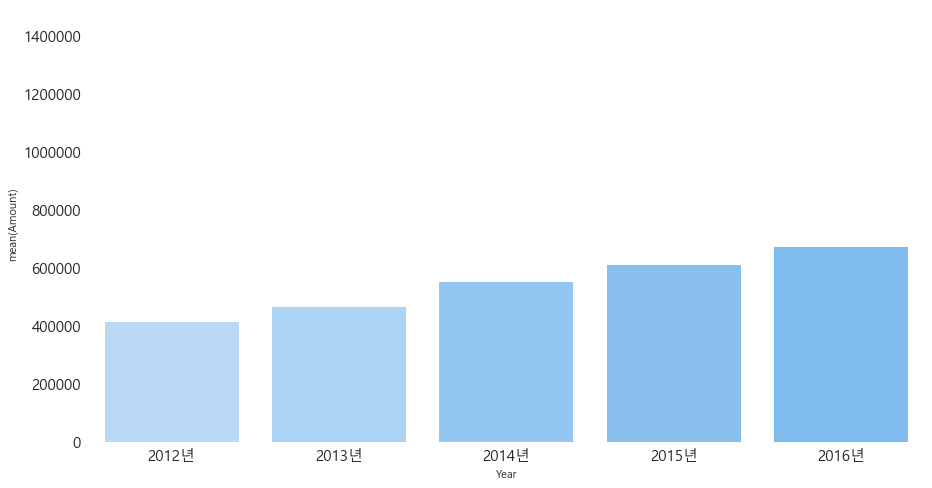

In [172]:
colors= ['#afdaff','#a1d4ff','#84c7ff','#77c1ff','#6dbdff']

fig, ax = plt.subplots(1,1)
fig.set_size_inches(15,8)

ax = sns.barplot(data=Jeep_data, x='Year', y='Amount', palette=colors)


plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylim(0,1500000)

pathces = ax.patches

ax.set_xticklabels(['2012년','2013년','2014년','2015년','2016년'])

ax.set_facecolor('white')
plt.savefig('Toyota.png', transparent=True)

## Hyundai

In [173]:
test=data[data['Brand']=='Hyundai']
test = test[test['GLOBAL_SEGMENT']=='SUV']
print(test['Y2016'].sum())
Jeep_table = test
Jeep_table = Jeep_table[['GLOBAL_MODEL','Y2012','Y2013','Y2014','Y2015','Y2016']]
merge_table = Jeep_table
merge_table.index = [x for x in range(len(merge_table))]

220978


In [174]:
total_sum = [ merge_table['Y'+str(year)].sum() for year in range(2012,2017) ]
total_sum = [0] + total_sum
merge_table.loc[('total_sell')] = total_sum

C:\Users\kb910\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [175]:
Jeep_data = pd.DataFrame(merge_table.loc['total_sell']).reset_index()
Jeep_data.columns = ['Year','Amount']
Jeep_data = Jeep_data.drop(0)
Jeep_data

,Year,Amount
1,Y2012,128126
2,Y2013,130925
3,Y2014,155212
4,Y2015,181725
5,Y2016,220978


In [176]:
sell_list = [str(x)[:3]+','+str(x)[-3:]+'대' for x in Jeep_data['Amount']]
sell_list

['128,126대', '130,925대', '155,212대', '181,725대', '220,978대']

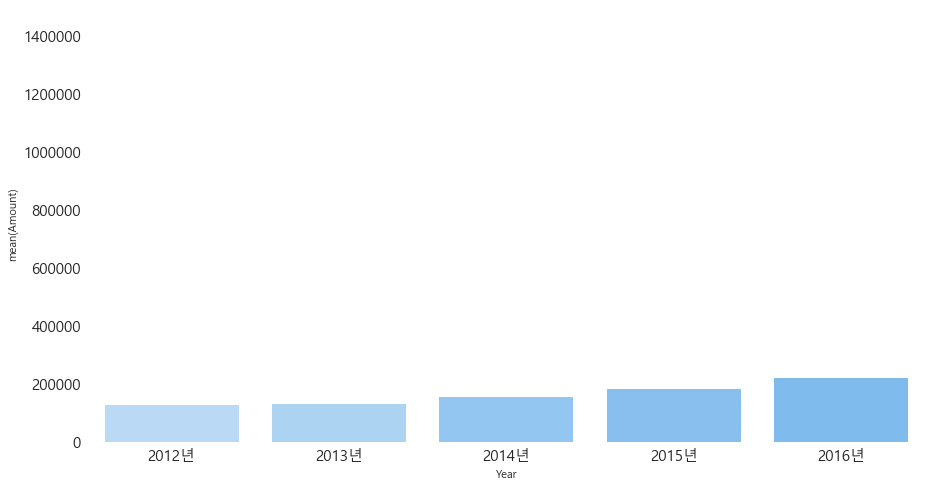

In [177]:
colors= ['#afdaff','#a1d4ff','#84c7ff','#77c1ff','#6dbdff']

fig, ax = plt.subplots(1,1)
fig.set_size_inches(15,8)

ax = sns.barplot(data=Jeep_data, x='Year', y='Amount', palette=colors)


plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylim(0,1500000)

pathces = ax.patches

ax.set_xticklabels(['2012년','2013년','2014년','2015년','2016년'])

ax.set_facecolor('white')

plt.savefig('Hyundai.png', transparent=True)

## 계산기

In [593]:
def calcu(x,y):
    return ((y-x)/x) *100

In [621]:
calcu(181725, 220978)

21.600220112807815

In [ ]:
# ['474,131대', '490,454대', '692,348대', '865,028대', '926,376대']
# ['414,479대', '463,269대', '550,396대', '608,213대', '672,540대']
# ['128,126대', '130,925대', '155,212대', '181,725대', '220,978대']